In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['reshape', 'eye', 'cbrt', 'seterr', 'maximum', 'conjugate', 'cos', 'sqrt', 'roots', 'sin', 'ifft', 'plot', 'beta', 'exp', 'ones', 'invert', 'sinh', 'gcd', 'plotting', 'lcm', 'mod', 'interactive', 'prod', 'Circle', 'nan', 'add', 'floor', 'tan', 'tanh', 'diag', 'cosh', 'minimum', 'vectorize', 'var', 'partition', 'source', 'sinc', 'diff', 'take', 'deprecated', 'binomial', 'trunc', 'trace', 'pi', 'gamma', 'det', 'fft', 'Line2D', 'test', 'log', 're', 'array', 'Number', 'zeros', 'power', 'poly', 'multinomial', 'product', 'flatten', 'Polygon', 'solve', 'sign', 'transpose']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Нужно создать алгоритм построения интерполяционных сплайнов. 

Для проверки работоспособности программы требуется для той же функции 𝑓(𝑥),
что и в работе 2.1, задав отрезок [𝑎, 𝑏] из крайних точек, выбирая промежуточные точки с
шагом $ℎ=\frac{a - b}{N}$ 

𝑁 задано, построить следующие интерполяционные сплайны:
 - Линейный
 - Квадратичный с граничным условием $𝑓^\prime(𝑎) = 0$
 - Квадратичный с граничным условием $𝑓^\prime(b) = 0$
 - Кубический с граничными условиями $𝑓^{\prime\prime}(𝑎) = 𝑓^{\prime\prime}(b)$

Построим график заданной функции (sh2x) на участке от 0 до 1:

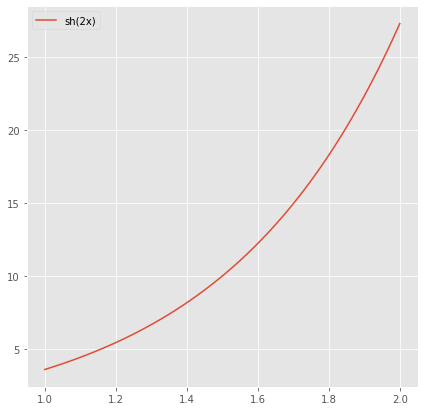

In [48]:
plt.figure(figsize = (7, 7))

x = np.linspace(1, 2, 50)
y = (np.exp(2*x) - np.exp(-2*x)) / 2

plt.plot(x, y, label = 'sh(2x)')
plt.legend()
plt.show()

Массив опорных точек по которому нужно восстановить функцию:

#### N = 10

In [49]:
x = np.array([1, 1.2, 1.4, 1.6, 1.8, 2])

X = np.linspace(1, 2, 10)
Y = (np.exp(2*X) - np.exp(-2*X)) / 2

In [50]:
data = pd.DataFrame(columns = ['x', 'f(x)'],
            data = np.array([X, Y]).T)
# выведем несколько точек
data.head()

,x,f(x)
0,1.000000,3.626860
1,1.111111,4.559723
2,1.222222,5.718686
3,1.333333,7.161216
4,1.444444,8.958845


In [51]:
L, F = [], []
for i in range(data.x.shape[0] - 1):
    L.append((data['f(x)'][i] - data['f(x)'][i + 1]) / (data['x'][i] - data['x'][i + 1]))
    F.append(data['f(x)'][i] - data['x'][i] * (data['f(x)'][i] - data['f(x)'][i + 1]) / (data['x'][i] - data['x'][i + 1]))

In [52]:
def linear_function(i, x, L, F):
    return L[i] * x + F[i] 

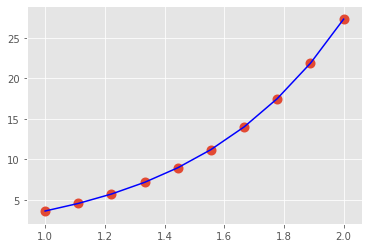

In [53]:
s = []
for i in range(data.x.shape[0]):
    if i == 0 or i == 1:
        s.append(linear_function(0, data.x[i], L, F))
    else:
        s.append(linear_function(i - 1, data.x[i], L, F))
    
plt.plot(data.x.iloc[:10], s, color = 'b')
plt.scatter(data['x'].iloc[:10], data['f(x)'].iloc[:10], linewidths = 4);

In [54]:
for i in range(data.x.shape[0] - 1):
    print('{ %.4f' % data.x[i], '%.4f' % data.x[i + 1], '}: ',
          '%.4f' % L[i], '* x + ', '%.4f' % F[i])

{ 1.0000 1.1111 }:  8.3958 * x +  -4.7689
{ 1.1111 1.2222 }:  10.4307 * x +  -7.0299
{ 1.2222 1.3333 }:  12.9828 * x +  -10.1492
{ 1.3333 1.4444 }:  16.1787 * x +  -14.4103
{ 1.4444 1.5556 }:  20.1768 * x +  -20.1854
{ 1.5556 1.6667 }:  25.1754 * x +  -27.9610
{ 1.6667 1.7778 }:  31.4224 * x +  -38.3726
{ 1.7778 1.8889 }:  39.2274 * x +  -52.2483
{ 1.8889 2.0000 }:  48.9777 * x +  -70.6654


#### N = 50

In [55]:
def linear_interp(N):
    X = np.linspace(1, 2, N)
    Y = (np.exp(2*X) - np.exp(-2*X)) / 2
    data = pd.DataFrame(columns = ['x', 'f(x)'],
            data = np.array([X, Y]).T)
    
    L, F = [], []
    for i in range(data.x.shape[0] - 1):
        L.append((data['f(x)'][i] - data['f(x)'][i + 1]) / (data['x'][i] - data['x'][i + 1]))
        F.append(data['f(x)'][i] - data['x'][i] * (data['f(x)'][i] - data['f(x)'][i + 1]) / (data['x'][i] - data['x'][i + 1]))
        
    s = []
    for i in range(data.x.shape[0]):
        if i == 0 or i == 1:
            s.append(linear_function(0, data.x[i], L, F))
        else:
            s.append(linear_function(i - 1, data.x[i], L, F))
            
    plt.figure(figsize = (10, 10))
    plt.plot(data.x, s, color = 'b')
    plt.scatter(data['x'], data['f(x)']);
    
    for i in range(data.x.shape[0] - 1):
        print('{ %.4f' % data.x[i], '%.4f' % data.x[i + 1], '}: ', '%.4f' % L[i], '* x + ', '%.4f' % F[i])

{ 1.0000 1.0204 }:  7.6745 * x +  -4.0477
{ 1.0204 1.0408 }:  7.9834 * x +  -4.3629
{ 1.0408 1.0612 }:  8.3056 * x +  -4.6982
{ 1.0612 1.0816 }:  8.6417 * x +  -5.0548
{ 1.0816 1.1020 }:  8.9921 * x +  -5.4339
{ 1.1020 1.1224 }:  9.3575 * x +  -5.8366
{ 1.1224 1.1429 }:  9.7385 * x +  -6.2643
{ 1.1429 1.1633 }:  10.1358 * x +  -6.7183
{ 1.1633 1.1837 }:  10.5499 * x +  -7.2000
{ 1.1837 1.2041 }:  10.9816 * x +  -7.7110
{ 1.2041 1.2245 }:  11.4316 * x +  -8.2528
{ 1.2245 1.2449 }:  11.9007 * x +  -8.8272
{ 1.2449 1.2653 }:  12.3896 * x +  -9.4358
{ 1.2653 1.2857 }:  12.8991 * x +  -10.0805
{ 1.2857 1.3061 }:  13.4301 * x +  -10.7632
{ 1.3061 1.3265 }:  13.9835 * x +  -11.4860
{ 1.3265 1.3469 }:  14.5602 * x +  -12.2510
{ 1.3469 1.3673 }:  15.1611 * x +  -13.0605
{ 1.3673 1.3878 }:  15.7873 * x +  -13.9167
{ 1.3878 1.4082 }:  16.4399 * x +  -14.8223
{ 1.4082 1.4286 }:  17.1198 * x +  -15.7797
{ 1.4286 1.4490 }:  17.8282 * x +  -16.7917
{ 1.4490 1.4694 }:  18.5664 * x +  -17.8613
{ 1.4694

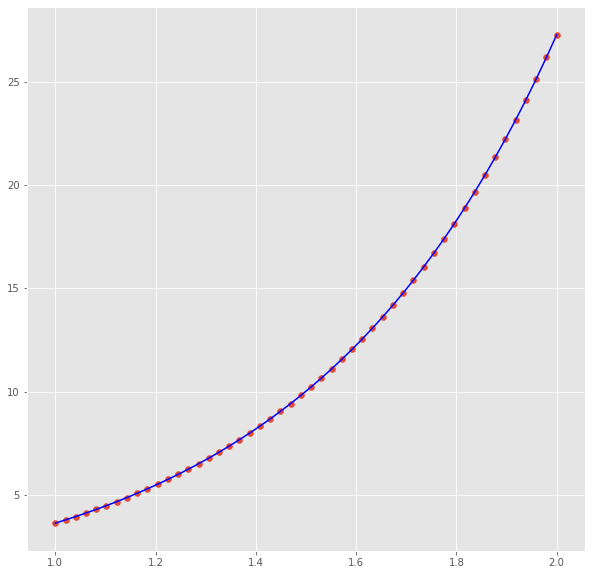

In [56]:
linear_interp(50)

#### Квадратичный сплайн слева

In [57]:
from sympy import *
x = symbols('x')
y = (functions.elementary.exponential.exp(2*x) - \
     functions.elementary.exponential.exp(-2*x)) / 2

In [58]:
def left_square_interp(y, ab, N):
    xi = []
    yi = []
    a = ab[0]
    b = ab[1]
    h = (b - a) / N
    while a < b:
        xi.append(a)
        yi.append(y.evalf(subs={'x': a}))
        a += h
    if round(a - h, 5) != b:
        xi.append(b)
        yi.append(y.evalf(subs={'x': a}))

    const = [[] for i in range(N)]
    for i in range(N):
        A = numpy.array([[1, xi[i], xi[i] ** 2], [1, xi[i + 1], xi[i + 1] ** 2], [0, 1, 2 * xi[i]]])
        if i == 0: a = numpy.array([yi[i], yi[i + 1], 0])
        else: a = numpy.array([yi[i], yi[i + 1], const[i - 1][1] + 2 * const[i - 1][2] * xi[i]])
        for j in np.linalg.solve(A, a.astype(float64)): const[i].append(float(j))


    yn = {}
    for i in range(N):
        yn[xi[i], xi[i + 1]] = const[i][0] + const[i][1] * x + const[i][2] * x ** 2
        
    return yn

#### N = 10

In [59]:
interp = left_square_interp(y, [1, 2], 10)

In [60]:
for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)

{ 1.0000 , 1.1000 } :  83.0244762688875*x**2 - 166.048952537775*x + 86.6513366767345
{ 1.1000 , 1.2000 } :  -65.136548223755*x**2 + 159.905301346038*x - 92.6235029593629
{ 1.2000 , 1.3000 } :  87.0744453814937*x**2 - 205.401083306558*x + 126.560327832195
{ 1.3000 , 1.4000 } :  -60.2061342690276*x**2 + 177.528423784797*x - 122.343851777186
{ 1.4000 , 1.5000 } :  93.0831790022024*x**2 - 251.681653374647*x + 178.103202234425
{ 1.5000 , 1.6000 } :  -52.8779294040421*x**2 + 186.201671844087*x - 150.309291679625
{ 1.6000 , 1.7000 } :  102.024961703771*x**2 - 309.487579700916*x + 246.242109556377
{ 1.7000 , 1.8000 } :  -41.9637037293591*x**2 + 180.073882771727*x - 169.88513354537
{ 1.8000 , 1.9000 } :  115.349656550356*x**2 - 386.254214235247*x + 339.810153760907
{ 1.9000 , 2.0000 } :  -25.6937729205063*x**2 + 149.710817754029*x - 169.356626628906


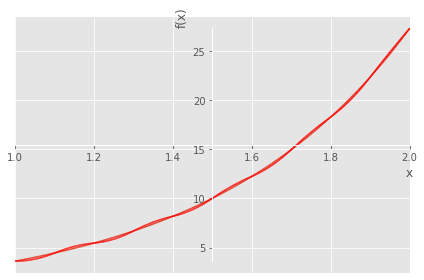

In [61]:
ab = [1, 2]
p = plot(y, (x, ab[0], ab[1]), show=False)
for i, j in left_square_interp(y, ab, 10):
    p.extend(plot(left_square_interp(y, ab, 10)[i, j], (x, i, j), line_color='r', show=False))
p.show()        

#### N = 50

In [62]:
interp = left_square_interp(y, [1, 2], 50)

In [63]:
for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)

{ 1.0000 , 1.0200 } :  383.574590383211*x**2 - 767.149180766422*x + 387.201450791058
{ 1.0200 , 1.0400 } :  -368.451413144843*x**2 + 766.983866430808*x - 395.206403279529
{ 1.0400 , 1.0600 } :  384.212591871347*x**2 - 798.557264002866*x + 418.874984545981
{ 1.0600 , 1.0800 } :  -367.788190408071*x**2 + 795.684394429498*x - 426.073094423172
{ 1.0800 , 1.1000 } :  384.902097154656*x**2 - 830.126626705991*x + 451.864856989992
{ 1.1000 , 1.1200 } :  -367.071299222975*x**2 + 824.214845324798*x - 458.022952626942
{ 1.1200 , 1.1400 } :  385.64752142056*x**2 - 861.875312916721*x + 486.187535988309
{ 1.1400 , 1.1600 } :  -366.296149038273*x**2 + 852.556255729419*x - 491.038458139991
{ 1.1600 , 1.1800 } :  386.453637929495*x**2 - 893.823250035803*x + 521.861655203838
{ 1.1800 , 1.2000 } :  -365.457776246794*x**2 + 880.687687420237*x - 525.099797895226
{ 1.2000 , 1.2200 } :  387.325608579255*x**2 - 925.99243616228*x + 558.908276254285
{ 1.2200 , 1.2400 } :  -364.550812399991*x**2 + 908.5860310270

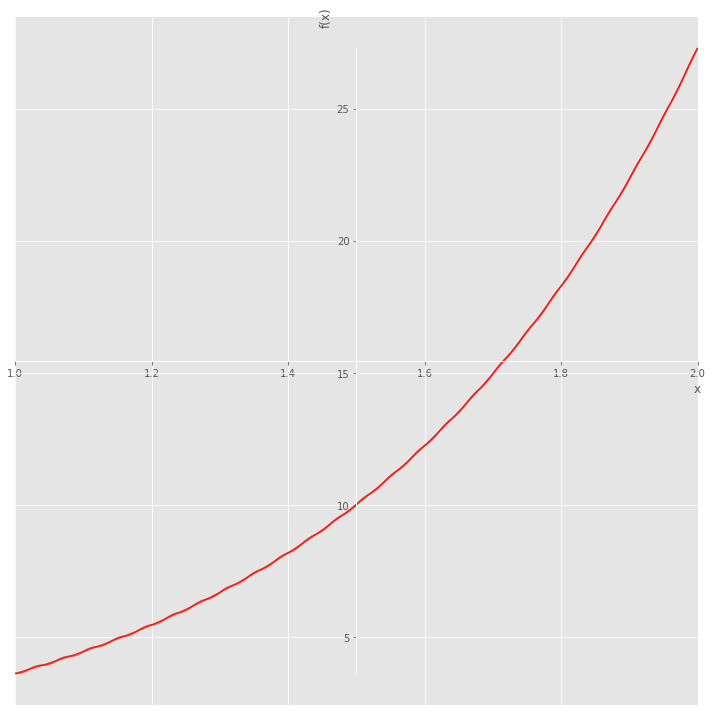

In [82]:
p = plot(y, (x, ab[0], ab[1]), show=False)
for i, j in interp:
    p.extend(plot(left_square_interp(y, ab, 50)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        

#### Квадратичный сплайн справа

In [65]:
def right_square_interp(y, ab, N):    
    xi = []
    yi = []
    a = ab[0]
    b = ab[1]
    h = (b - a) / N
    while a < b:
        xi.append(a)
        yi.append(y.evalf(subs = {'x': a}))
        a += h
    if round(a - h, 5) != b:
        xi.append(b)
        yi.append(y.evalf(subs = {'x': b}))

    const = [[] for i in range(N)]
    for i in range(N, 0, -1):
        A = numpy.array([[1, xi[i], xi[i] ** 2], [1, xi[i - 1], xi[i - 1] ** 2], [0, 1, 2 * xi[i]]])
        if i == N: a = numpy.array([yi[i], yi[i - 1], 0])
        else: a = numpy.array([yi[i], yi[i - 1], const[N - 1 - i][1] + 2 * const[N - 1 - i][2] * xi[i]])
        for j in np.linalg.solve(A, a.astype(float64)): const[N - i].append(float(j))

    const_new = []
    for i in reversed(const): const_new.append(i)

    yn = {}
    for i in range(N):
        yn[xi[i], xi[i + 1]] = const_new[i][0] + const_new[i][1] * x + const_new[i][2] * x ** 2

    return yn

#### N = 10

In [66]:
interp = right_square_interp(y, [1, 2], 10)

for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)

{ 1.0000 , 1.1000 } :  552.381736988923*x**2 - 1151.69920004985*x + 602.944323468773
{ 1.1000 , 1.2000 } :  -534.49380894379*x**2 + 1239.42700100212*x - 712.17508710981
{ 1.2000 , 1.3000 } :  556.431706101533*x**2 - 1378.79423510666*x + 858.757654555457
{ 1.3000 , 1.4000 } :  -529.563394989062*x**2 + 1444.79302772889*x - 976.57406628765
{ 1.4000 , 1.5000 } :  562.440439722232*x**2 - 1612.81770946273*x + 1163.75344974649
{ 1.5000 , 1.6000 } :  -522.23519012407*x**2 + 1641.20918007617*x - 1276.76671740769
{ 1.6000 , 1.7000 } :  571.382222423807*x**2 - 1858.36654007703*x + 1522.89385871487
{ 1.7000 , 1.8000 } :  -511.320964449406*x**2 + 1822.82429529189*x - 1606.11835134871
{ 1.8000 , 1.9000 } :  584.706917270396*x**2 - 2122.8760788994*x + 1945.01198542345
{ 1.9000 , 2.0000 } :  -495.05103364055*x**2 + 1980.2041345622*x - 1952.91421736507


In [89]:
p = plot(y, (x, ab[0], ab[1]), show = False)
for i, j in interp:
    p.extend(plot(right_square_interp(y, ab, 10)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        

KeyError: (1, 1.02)

#### N = 50

In [68]:
interp = right_square_interp(y, [1, 2], 50)

for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)

{ 1.0000 , 1.0200 } :  2737.86440793779*x**2 - 5522.81461222666*x + 2788.57706469672
{ 1.0200 , 1.0400 } :  -2722.74123069917*x**2 + 5616.82089059273*x - 2892.63704174117
{ 1.0400 , 1.0600 } :  2738.50240942514*x**2 - 5742.56588086582*x + 3014.24407941728
{ 1.0600 , 1.0800 } :  -2722.07800796237*x**2 + 5833.86460399568*x - 3121.26407755932
{ 1.0800 , 1.1000 } :  2739.19191470925*x**2 - 5962.478428975*x + 3248.76116024485
{ 1.1000 , 1.1200 } :  -2721.36111677763*x**2 + 6050.73824029613*x - 3358.50800785427
{ 1.1200 , 1.1400 } :  2739.937338975*x**2 - 6182.57030058977*x + 3492.14477504183
{ 1.1400 , 1.1600 } :  -2720.58596659227*x**2 + 6267.4228361036*x - 3604.35131287339
{ 1.1600 , 1.1800 } :  2740.74345548404*x**2 - 6402.86142311344*x + 3744.41355747249
{ 1.1800 , 1.2000 } :  -2719.74759380169*x**2 + 6483.89745320089*x - 3858.77417955296
{ 1.2000 , 1.2200 } :  2741.6154261342*x**2 - 6623.37379464525*x + 4005.58856915472
{ 1.2200 , 1.2400 } :  -2718.84062995477*x**2 + 6700.13898221185*x

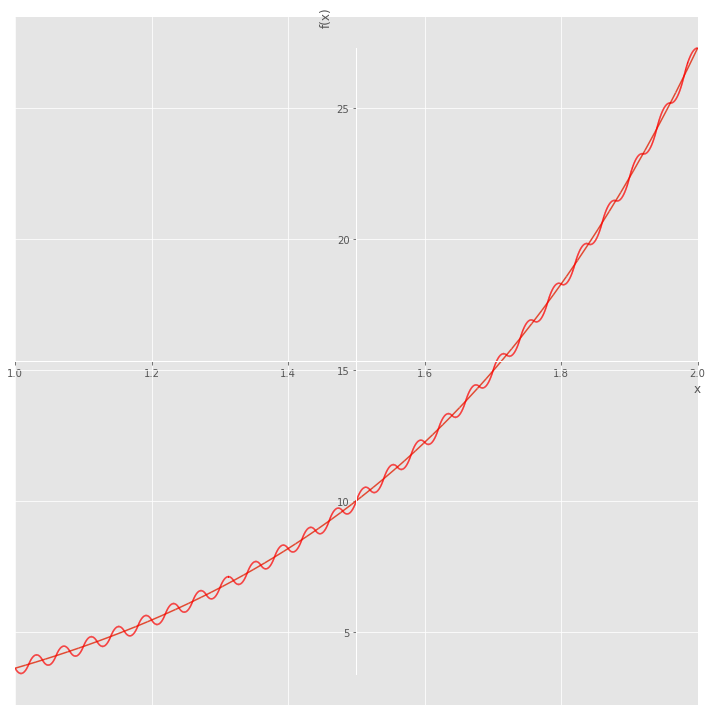

In [90]:
p = plot(y, (x, ab[0], ab[1]), show = False)
for i, j in interp:
    p.extend(plot(right_square_interp(y, ab, 50)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        

#### Кубический сплайн

In [70]:
def cube_interp(y, ab, N):
    xi = []
    yi = []
    a = ab[0]
    b = ab[1]
    h = (b - a) / N
    while a < b:
        xi.append(a)
        yi.append(y.evalf(subs = {'x': a}))
        a += h
    if round(a - h, 5) != b:
        xi.append(b)
        yi.append(y.evalf(subs = {'x': b}))

    A = numpy.zeros([N - 1, N - 1])
    A[0, 0] = 2 * (xi[2] - xi[0])
    A[0, 1] = xi[2] - xi[1]
    A[N - 2, N - 3] = xi[N - 1] - xi[N - 2]
    A[N - 2, N - 2] = 2 * (xi[N] - xi[N - 2])
    for i in range(2, N - 1):
        A[i - 1, i - 2] = xi[i] - xi[i - 1]
        A[i - 1, i - 1] = 2 * (xi[i + 1] - xi[i - 1])
        A[i - 1, i] = xi[i + 1] - xi[i]

    a = numpy.zeros([N - 1])
    for i in range(1, N):
        a[i - 1] = 6 * ((yi[i + 1] - yi[i]) / (xi[i + 1] - xi[i]) - (yi[i] - yi[i - 1]) / (xi[i] - xi[i - 1]))

    ci = [0]
    for j in np.linalg.solve(A, a):
        ci.append(float(j))
    ci.append(0)

    di = [0]
    for i in range(1, N + 1):
        di.append((ci[i] - ci[i - 1]) / (xi[i] - xi[i - 1]))

    bi = [0]
    for i in range(1, N + 1):
        hi = xi[i] - xi[i - 1]
        bi.append(ci[i] * hi / 2 - di[i] * hi ** 2 / 6 + (yi[i] - yi[i - 1]) / hi)

    ai = []
    for i in yi: ai.append(i)

    yn = {}
    for i in range(1, N + 1):
        yn[xi[i - 1], xi[i]] = ai[i] + bi[i] * (x - xi[i]) + ci[i] * (x - xi[i]) ** 2 / 2 + di[i] * (x - xi[i]) ** 3 / 6

    return yn

#### N = 10

In [71]:
interp = cube_interp(y, [1, 2], 10)

for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)
    print(' ')

{ 1.0000 , 1.1000 } :  9.02391790223827*x + 48.0138468245104*(0.909090909090909*x - 1)**3 + 13.0946854975938*(0.909090909090909*x - 1)**2 - 5.4692045219262
 
{ 1.1000 , 1.2000 } :  11.1436800767052*x - 2.57176233109961*(0.833333333333333*x - 1)**3 + 14.9408173647747*(0.833333333333333*x - 1)**2 - 7.90618687837019
 
{ 1.2000 , 1.3000 } :  13.5301735266744*x + 22.8033899934341*(0.769230769230769*x - 1)**3 + 22.797030036097*(0.769230769230769*x - 1)**2 - 10.894493356283
 
{ 1.3000 , 1.4000 } :  16.506300033392*x + 25.4508862599977*(0.714285714285714*x - 1)**3 + 31.8929204365465*(0.714285714285714*x - 1)**2 - 14.9169016925128
 
{ 1.4000 , 1.5000 } :  20.1389073102446*x + 42.550609552908*(0.666666666666667*x - 1)**3 + 45.1218928198824*(0.666666666666667*x - 1)**2 - 20.1904860379569
 
{ 1.5000 , 1.6000 } :  24.5570399955172*x + 55.609721917405*(0.625*x - 1)**3 + 61.7655098012463*(0.625*x - 1)**2 - 27.045379996262
 
{ 1.6000 , 1.7000 } :  30.0575865469401*x + 110.561513015309*(0.5882352941176

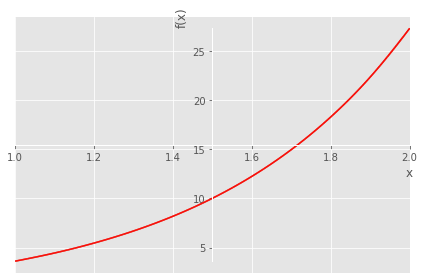

In [72]:
p = plot(y, (x, ab[0], ab[1]), show = False)
for i, j in interp:
    p.extend(plot(cube_interp(y, ab, 10)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        

#### N = 50

In [73]:
interp = cube_interp(y, [1, 2], 50)

for key, value in zip(interp.keys(), interp.values()):
    print('{ %.4f' % key[0], ', %.4f' % key[1], '} : ', value)
    print(' ')

{ 1.0000 , 1.0200 } :  7.79819770049536*x + 168.076633900568*(0.980392156862745*x - 1)**3 + 9.88686081768048*(0.980392156862745*x - 1)**2 - 4.17387141050499
 
{ 1.0200 , 1.0400 } :  8.13541181705111*x - 40.2172269152832*(0.961538461538461*x - 1)**3 + 7.95815739680347*(0.961538461538461*x - 1)**2 - 4.52105893868427
 
{ 1.0400 , 1.0600 } :  8.44955786947491*x + 19.6869960480283*(0.943396226415094*x - 1)**3 + 9.38154174601928*(0.943396226415094*x - 1)**2 - 4.85097841205529
 
{ 1.0600 , 1.0800 } :  8.786894354621*x + 3.52187647532934*(0.925925925925926*x - 1)**3 + 9.93456180895258*(0.925925925925926*x - 1)**2 - 5.21193963427799
 
{ 1.0800 , 1.1000 } :  9.13570085420746*x + 9.00097570798183*(0.909090909090909*x - 1)**3 + 10.7968777681626*(0.909090909090909*x - 1)**2 - 5.59216576909232
 
{ 1.1000 , 1.1200 } :  9.49982065140935*x + 8.42748178621009*(0.892857142857143*x - 1)**3 + 11.6445329595247*(0.892857142857143*x - 1)**2 - 5.99636273804671
 
{ 1.1200 , 1.1400 } :  9.87895617077366*x + 9.65

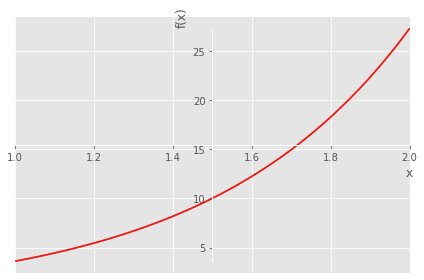

In [74]:
p = plot(y, (x, ab[0], ab[1]), show = False)
for i, j in interp:
    p.extend(plot(cube_interp(y, ab, 50)[i, j], (x, i, j), line_color = 'r', show = False))
p.show()        